<a href="https://colab.research.google.com/github/gilvandrocesardemedeiros/Meteorology_replace-missing-values/blob/master/Replace_Missing_Values_Temperature%5BFlorianopolis%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#Leitura de dados
dataSet = pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/florianopolisdiario.csv",
                      sep=';',skiprows=16)

In [0]:
#Transformando data em variável do tipo datetime
dataSet["Data"] = pd.to_datetime(dataSet["Data"], format = "%d/%m/%Y")

In [4]:
#Descrevendo base de dados
dataSet.describe()

,Estacao,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
count,21459.0,21459.000000,10634.000000,9549.000000,9511.000000,10509.000000,10378.000000,9476.000000,10641.000000,10484.000000,0.0
mean,83897.0,599.916119,4.832293,25.238507,17.514583,5.543477,3.055463,21.054375,80.042477,2.943269,NaN
std,0.0,600.013975,12.659341,4.061012,4.127697,3.872642,1.462117,3.804394,8.054778,1.727203,NaN
min,83897.0,0.000000,0.000000,10.800000,0.700000,0.000000,0.000000,8.280000,40.000000,0.000000,NaN
25%,83897.0,0.000000,0.000000,22.400000,14.900000,1.500000,2.000000,18.420000,75.000000,1.691667,NaN
50%,83897.0,0.000000,0.000000,25.300000,18.100000,6.200000,2.900000,21.320000,80.750000,2.666667,NaN
75%,83897.0,1200.000000,3.600000,28.200000,20.700000,9.000000,3.900000,24.060000,85.750000,3.866667,NaN
max,83897.0,1200.000000,253.000000,38.600000,26.600000,12.800000,15.800000,30.160000,98.000000,20.000000,NaN


In [5]:
#Verificando dados
dataSet.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
0,83897,1980-01-01,0,NaN,25.0,NaN,12.3,4.1,21.54,65.50,5.166667,NaN
1,83897,1980-01-01,1200,0.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2,83897,1980-01-02,0,NaN,24.4,NaN,11.7,3.5,NaN,70.75,6.366667,NaN
3,83897,1980-01-02,1200,0.0,NaN,14.6,NaN,NaN,NaN,NaN,NaN,NaN
4,83897,1980-01-03,0,NaN,26.4,NaN,11.5,4.5,NaN,73.50,3.333333,NaN


In [0]:
#Atribuindo "Data" como índice para a base de dados
dataSet = dataSet.set_index("Data")

In [0]:
#Separando os dados em dois dataframes, um para as 00:00 h e outro para as 12:00 h
dataSet00, dataSet12 = dataSet[dataSet["Hora"] == 0], dataSet[dataSet["Hora"] == 1200]

In [0]:
#Descartando as colunas "Hora", "Estacao" e "Unnamed: 11" 
dataSet00, dataSet12 = dataSet00.drop(columns = ["Hora", "Estacao", "Unnamed: 11"]), dataSet12.drop(columns = ["Hora", "Estacao", "Unnamed: 11"])

In [9]:
#Verificando dataframe para os dados disponibilizados às 00:00 h
dataSet00.describe()

,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,0.0,9549.000000,0.0,10509.000000,10378.000000,9476.000000,10641.000000,10484.000000
mean,NaN,25.238507,NaN,5.543477,3.055463,21.054375,80.042477,2.943269
std,NaN,4.061012,NaN,3.872642,1.462117,3.804394,8.054778,1.727203
min,NaN,10.800000,NaN,0.000000,0.000000,8.280000,40.000000,0.000000
25%,NaN,22.400000,NaN,1.500000,2.000000,18.420000,75.000000,1.691667
50%,NaN,25.300000,NaN,6.200000,2.900000,21.320000,80.750000,2.666667
75%,NaN,28.200000,NaN,9.000000,3.900000,24.060000,85.750000,3.866667
max,NaN,38.600000,NaN,12.800000,15.800000,30.160000,98.000000,20.000000


In [10]:
#Verificando dataframe para os dados disponibilizados às 12:00 h
dataSet12.describe()

,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,10634.000000,0.0,9511.000000,0.0,0.0,0.0,0.0,0.0
mean,4.832293,NaN,17.514583,NaN,NaN,NaN,NaN,NaN
std,12.659341,NaN,4.127697,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,0.700000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,14.900000,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,18.100000,NaN,NaN,NaN,NaN,NaN
75%,3.600000,NaN,20.700000,NaN,NaN,NaN,NaN,NaN
max,253.000000,NaN,26.600000,NaN,NaN,NaN,NaN,NaN


In [0]:
#Eliminando colunas completas por "NaN" em cada uma das bases de dados
dataSet00 = dataSet00.drop(columns = ["Precipitacao","TempMinima"])
dataSet12 = dataSet12.drop(columns = ["TempMaxima","Insolacao","Evaporacao Piche","Temp Comp Media","Umidade Relativa Media","Velocidade do Vento Media"])

In [12]:
#Exibindo a base de dados recém filtrada para 00:00 h
dataSet00.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
Data,,,,,,
1980-01-01,25.0,12.3,4.1,21.54,65.50,5.166667
1980-01-02,24.4,11.7,3.5,NaN,70.75,6.366667
1980-01-03,26.4,11.5,4.5,NaN,73.50,3.333333
1980-01-04,27.4,8.6,3.5,23.40,70.25,4.066667
1980-01-05,27.4,8.0,3.7,23.04,75.25,3.933333


In [13]:
#Exibindo a base de dados recém filtrada para 12:00 h
dataSet12.head()

,Precipitacao,TempMinima
Data,,
1980-01-01,0.0,17.0
1980-01-02,0.0,14.6
1980-01-03,0.0,15.0
1980-01-04,0.0,18.8
1980-01-05,0.0,20.2


In [0]:
#Criando o intervalo completo de tempo de 01-01-1980 à 31-12-2017
dataInicial = '1980-01-01'
dataFinal = '2017-12-31'
tempo = pd.date_range(dataInicial, dataFinal)
#Atribuindo este intervalo de tempo à um dataSet provisório
dataSetProv = pd.DataFrame()
dataSetProv["Data"] = tempo

In [0]:
#Atribuindo o índice para o dataSet provisório como sendo a coluna de datas
dataSetProv = dataSetProv.set_index("Data")

In [16]:
#Visualizando o dataSet provisório
dataSetProv.head()

""
Data
1980-01-01
1980-01-02
1980-01-03
1980-01-04
1980-01-05


In [0]:
#Mesclando o dataSet provisório como sendo o resultado da junção dos dataSet00 e dataSet12
dataSetProv = dataSetProv.join(dataSet00).join(dataSet12)

In [18]:
#Mostrando o resultado da junção
dataSetProv.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,,
1980-01-01,25.0,12.3,4.1,21.54,65.50,5.166667,0.0,17.0
1980-01-02,24.4,11.7,3.5,NaN,70.75,6.366667,0.0,14.6
1980-01-03,26.4,11.5,4.5,NaN,73.50,3.333333,0.0,15.0
1980-01-04,27.4,8.6,3.5,23.40,70.25,4.066667,0.0,18.8
1980-01-05,27.4,8.0,3.7,23.04,75.25,3.933333,0.0,20.2


In [19]:
#Quantidade de dias existentes na base de dados
len(dataSetProv)

13880

In [0]:
#Tornando o dataSet como sendo o dataSet provisório
dataSet = dataSetProv

In [21]:
#Descrevendo o novo dataSet
dataSet.describe()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
count,9549.000000,10509.000000,10378.000000,9476.000000,10641.000000,10484.000000,10634.000000,9511.000000
mean,25.238507,5.543477,3.055463,21.054375,80.042477,2.943269,4.832293,17.514583
std,4.061012,3.872642,1.462117,3.804394,8.054778,1.727203,12.659341,4.127697
min,10.800000,0.000000,0.000000,8.280000,40.000000,0.000000,0.000000,0.700000
25%,22.400000,1.500000,2.000000,18.420000,75.000000,1.691667,0.000000,14.900000
50%,25.300000,6.200000,2.900000,21.320000,80.750000,2.666667,0.000000,18.100000
75%,28.200000,9.000000,3.900000,24.060000,85.750000,3.866667,3.600000,20.700000
max,38.600000,12.800000,15.800000,30.160000,98.000000,20.000000,253.000000,26.600000


In [22]:
#Mostrando o cabeçalho do novo dataSet
dataSet.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,,
1980-01-01,25.0,12.3,4.1,21.54,65.50,5.166667,0.0,17.0
1980-01-02,24.4,11.7,3.5,NaN,70.75,6.366667,0.0,14.6
1980-01-03,26.4,11.5,4.5,NaN,73.50,3.333333,0.0,15.0
1980-01-04,27.4,8.6,3.5,23.40,70.25,4.066667,0.0,18.8
1980-01-05,27.4,8.0,3.7,23.04,75.25,3.933333,0.0,20.2


# Modelagem para previsão de Temperatura Máxima

In [0]:
#Separando base de dados para treino de rede neural para previsão de temperatura máxima
dataTreinoTempMax = dataSet.dropna(subset = ["TempMaxima"])

In [0]:
#Separando a variável que será prevista, TempMaxima, da base de dados
tempMax = dataTreinoTempMax["TempMaxima"]
dataTreinoTempMax = dataTreinoTempMax.drop(columns = "TempMaxima")

In [25]:
#Visualizando cabeçalho dos dados para treino
dataTreinoTempMax.head()

,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,
1980-01-01,12.3,4.1,21.54,65.50,5.166667,0.0,17.0
1980-01-02,11.7,3.5,NaN,70.75,6.366667,0.0,14.6
1980-01-03,11.5,4.5,NaN,73.50,3.333333,0.0,15.0
1980-01-04,8.6,3.5,23.40,70.25,4.066667,0.0,18.8
1980-01-05,8.0,3.7,23.04,75.25,3.933333,0.0,20.2


In [26]:
#Visualizando cabeçalho das informações de temperatura 
tempMax.head()

Data
1980-01-01    25.0
1980-01-02    24.4
1980-01-03    26.4
1980-01-04    27.4
1980-01-05    27.4
Name: TempMaxima, dtype: float64

In [0]:
#Guardando a informação de como as colunas estão distribuídas no dataFrame
colunas = dataTreinoTempMax.columns

In [0]:
#Efetuando uma transformação que lineariza todas as informações para cada coluna entre -1 e 1
mms = MinMaxScaler(feature_range=(-1, 1))
dataTreinoTempMax = mms.fit_transform(dataTreinoTempMax)

In [29]:
#Visualizando como está a base de dados para treino após a linearização
prov = pd.DataFrame(dataTreinoTempMax)
prov.columns = colunas
prov.describe()

,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
count,9389.000000,9237.000000,9476.000000,9543.000000,9352.000000,9454.000000,9499.000000
mean,-0.128991,-0.558935,0.167676,0.374410,-0.671067,-0.961397,0.298608
std,0.604039,0.209422,0.347751,0.277809,0.188368,0.100872,0.318830
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.750000,-0.710145,-0.073126,0.198276,-0.809467,-1.000000,0.096525
50%,-0.031250,-0.579710,0.191956,0.396552,-0.703704,-1.000000,0.343629
75%,0.421875,-0.434783,0.442413,0.568966,-0.570370,-0.969960,0.544402
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#Trocando dados faltantes por 0 
dataTreinoTempMax = np.nan_to_num(dataTreinoTempMax, copy = False)

In [31]:
#Verificando dimensões do dataSet
print(dataTreinoTempMax.shape)

(9549, 7)


In [0]:
#Separando conjunto de treino e teste para previsão de temperatura máxima (90% para treino e 10% para teste)
X_trainTempMax, X_testTempMax, Y_trainTempMax, Y_testTempMax = train_test_split(dataTreinoTempMax, tempMax, test_size = 0.1, random_state = 9)

In [0]:
#Definindo uma função para criar a MLP
def trainMLP(optimizer='adam', init='random_uniform', units = 7, camadas = 2):    
  #Criando o modelo
  mlp = Sequential()
  #Adicionando a camada de entrada
  mlp.add(Dense(activation = 'tanh', input_dim = units, units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando as camadas escondidas
  for i in range(camadas):
    mlp.add(Dense(activation = 'tanh', units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando a camada de saída
  mlp.add(Dense(units = 1, kernel_initializer = init, bias_initializer='zeros'))    
  # Compilando o modelo
  mlp.compile(loss='mean_squared_error', optimizer = optimizer, metrics= ['mae'])
  return mlp

In [0]:
#Modelo de classificação do Keras
estimator = KerasRegressor(build_fn=trainMLP, epochs = 200, verbose = 2)

In [0]:
#Criando o objeto para Cross Validation
kfold = KFold(n_splits=4, shuffle=True, random_state=5)

In [0]:
#Parâmetros para o Grid Search
parameters = {'batch_size': [10],             
              'camadas': [2],
              'units': [7]}

In [0]:
#Modelagem para buscar os melhores parâmetros
grid_searchTempMax = GridSearchCV(estimator = estimator, param_grid = parameters,
                     scoring = "neg_mean_squared_error", verbose=500, cv = kfold, return_train_score = True)

In [38]:
#Busca pelos melhores parâmetros
grid_resultTempMax = grid_searchTempMax.fit(X_trainTempMax, Y_trainTempMax)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] batch_size=10, camadas=2, units=7 ...............................
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 1s - loss: 498.2973 - mean_absolute_error: 21.8762
Epoch 2/200
 - 1s - loss: 292.7064 - mean_absolute_error: 16.5810
Epoch 3/200
 - 1s - loss: 169.6921 - mean_absolute_error: 12.3362
Epoch 4/200
 - 1s - loss: 92.8656 - mean_absolute_error: 8.7509
Epoch 5/200
 - 1s - loss: 48.8920 - mean_absolute_error: 5.9819
Epoch 6/200
 - 1s - loss: 27.2880 - mean_absolute_error: 4.2846
Epoch 7/200
 - 1s - loss: 18.9124 - mean_absolute_error: 3.5518
Epoch 8/200
 - 1s - loss: 16.6247 - mean_absolute_error: 3.3429
Epoch 9/200
 - 1s - loss: 16.2171 - mean_absolute_error: 3.3020
Epoch 10/200
 - 1s - loss: 16.4615 - mean_absolute_error: 3.2996
Epoch 11/200
 - 1s - l

In [39]:
#Exibição dos melhores resultados
print("Melhor resultado: %f, usando %s" % (grid_resultTempMax.best_score_, grid_resultTempMax.best_params_))
means = grid_resultTempMax.cv_results_['mean_test_score']
stds = grid_resultTempMax.cv_results_['std_test_score']
params = grid_resultTempMax.cv_results_['params']
print("Resultados (Desvio padrão) {Parâmetros}")
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) %r" % (mean, stdev, param))

Melhor resultado: -1.287045, usando {'batch_size': 10, 'camadas': 2, 'units': 7}
Resultados (Desvio padrão) {Parâmetros}
-1.287045 (0.125038) {'batch_size': 10, 'camadas': 2, 'units': 7}


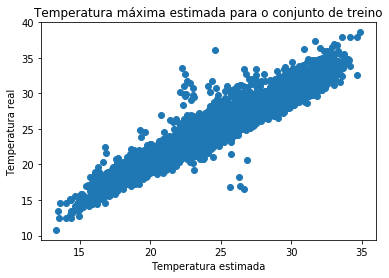

In [40]:
#Gráfico de previsão para o conjunto de treino
plt.scatter(grid_searchTempMax.predict(X_trainTempMax), Y_trainTempMax)
plt.title("Temperatura máxima estimada para o conjunto de treino")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [41]:
#Mostrando uma matriz de correlação das variáveis de treino com a melhor modelagem
print(np.corrcoef(grid_searchTempMax.predict(X_trainTempMax), Y_trainTempMax))

[[1.         0.96186719]
 [0.96186719 1.        ]]


In [0]:
#Previsão com base no resultado da Grid Search
Y_predTempMax = grid_searchTempMax.predict(X_testTempMax)

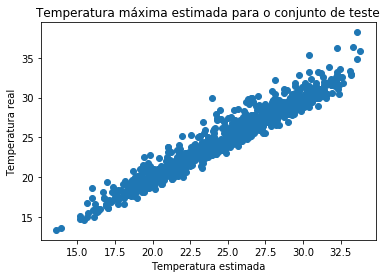

In [43]:
#Gráfico que mostra a relação entre a temperatura máxima real e a prevista para o conjunto de teste
plt.scatter(Y_predTempMax, Y_testTempMax)
plt.title("Temperatura máxima estimada para o conjunto de teste")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [44]:
#Mostrando uma matriz de correlação das variáveis de teste com a melhor modelagem
print(np.corrcoef(Y_predTempMax, Y_testTempMax))

[[1.         0.96665165]
 [0.96665165 1.        ]]


In [45]:
#Erro absoluto médio entre a temperatura máxima prevista e a real
print(mean_absolute_error(Y_testTempMax, Y_predTempMax))

0.7809051809260983


In [46]:
#Erro quadrático médio entre a temperatura máxima prevista e a real
print(mean_squared_error(Y_testTempMax, Y_predTempMax))

1.1234530470655584


# Modelagem para previsão de Temperatura Mínima

In [0]:
#Separando dados para treinar rede neural para previsão de temperatura mínima
dataTreinoTempMin = dataSet.dropna(subset = ["TempMinima"])

In [0]:
#Separando a variável que será prevista, TempMinima, da base de dados
tempMin = dataTreinoTempMin["TempMinima"]
dataTreinoTempMin = dataTreinoTempMin.drop(columns = "TempMinima")

In [49]:
#Visualizando dados de treino para temperatura mínima
dataTreinoTempMin.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao
Data,,,,,,,
1980-01-01,25.0,12.3,4.1,21.54,65.50,5.166667,0.0
1980-01-02,24.4,11.7,3.5,NaN,70.75,6.366667,0.0
1980-01-03,26.4,11.5,4.5,NaN,73.50,3.333333,0.0
1980-01-04,27.4,8.6,3.5,23.40,70.25,4.066667,0.0
1980-01-05,27.4,8.0,3.7,23.04,75.25,3.933333,0.0


In [50]:
#Visualizando informações de temperatura mínima para cada um dos dados de treino 
tempMin.head()

Data
1980-01-01    17.0
1980-01-02    14.6
1980-01-03    15.0
1980-01-04    18.8
1980-01-05    20.2
Name: TempMinima, dtype: float64

In [0]:
#Guardando informação de como as colunas estão distribuídas no dataFrame 
colunas = dataTreinoTempMin.columns

In [0]:
#Efetuando uma transformação que lineariza todas as informações para cada coluna entre -1 e 1
mms = MinMaxScaler(feature_range=(-1, 1))
dataTreinoTempMin = mms.fit_transform(dataTreinoTempMin)

In [53]:
#Visualizando como está a base de dados para treino após a linearização
prov = pd.DataFrame(dataTreinoTempMin)
prov.columns = colunas
prov.describe()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao
count,9499.000000,9344.000000,9193.000000,9472.000000,9501.000000,9314.000000,9417.000000
mean,0.038672,-0.129028,-0.559167,0.167703,0.374961,-0.670846,-0.961303
std,0.292339,0.604002,0.209314,0.347516,0.277309,0.188426,0.101400
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.165468,-0.750000,-0.710145,-0.073126,0.198276,-0.807407,-1.000000
50%,0.043165,-0.031250,-0.579710,0.191956,0.396552,-0.703704,-1.000000
75%,0.251799,0.421875,-0.434783,0.442413,0.577586,-0.570370,-0.969960
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#Trocando dados faltantes por 0
dataTreinoTempMin = np.nan_to_num(dataTreinoTempMin, copy = False)

In [55]:
#Verificando dimensões do dataSet
print(dataTreinoTempMin.shape)

(9511, 7)


In [0]:
#Separando conjunto de treino e teste para previsão de temperatura máxima (90% para treino e 10% para teste)
X_trainTempMin, X_testTempMin, Y_trainTempMin, Y_testTempMin = train_test_split(dataTreinoTempMin, tempMin, test_size = 0.1, random_state = 9)

In [0]:
#Modelo de classificação do Keras
estimator = KerasRegressor(build_fn=trainMLP, epochs = 200, verbose = 2)

In [0]:
#Criando o objeto para Cross Validation
kfold = KFold(n_splits=4, shuffle=True, random_state=5)

In [0]:
#Parâmetros para o Grid Search
parameters = {'batch_size': [10],             
              'camadas': [2],
              'units': [7]}

In [0]:
#Modelagem para buscar os melhores parâmetros
grid_searchTempMin = GridSearchCV(estimator = estimator, param_grid = parameters,
                     scoring = "neg_mean_squared_error", verbose=500, cv = kfold, return_train_score = True)

In [61]:
#Busca pelos melhores parâmetros
grid_resultTempMin = grid_searchTempMin.fit(X_trainTempMin, Y_trainTempMin)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] batch_size=10, camadas=2, units=7 ...............................
Epoch 1/200
 - 1s - loss: 220.8928 - mean_absolute_error: 14.1656
Epoch 2/200
 - 1s - loss: 102.7064 - mean_absolute_error: 9.2945
Epoch 3/200
 - 1s - loss: 49.0608 - mean_absolute_error: 6.1493
Epoch 4/200
 - 1s - loss: 26.1804 - mean_absolute_error: 4.3374
Epoch 5/200
 - 1s - loss: 18.7304 - mean_absolute_error: 3.5846
Epoch 6/200
 - 1s - loss: 12.7176 - mean_absolute_error: 2.8961
Epoch 7/200
 - 1s - loss: 5.8822 - mean_absolute_error: 1.9294
Epoch 8/200
 - 1s - loss: 3.2936 - mean_absolute_error: 1.4241
Epoch 9/200
 - 1s - loss: 2.2584 - mean_absolute_error: 1.1671
Epoch 10/200
 - 1s - loss: 1.8715 - mean_absolute_error: 1.0515
Epoch 11/200
 - 1s - loss: 1.6968 - mean_absolute_error: 0.9951
Epoch 12/200
 - 1s - loss: 1.5890 - mean_absolute_error: 0.9544
Epoch 13/200
 - 1s - 

In [62]:
#Exibição dos melhores resultados
print("Melhor resultado: %f, usando %s" % (grid_resultTempMin.best_score_, grid_resultTempMin.best_params_))
means = grid_resultTempMin.cv_results_['mean_test_score']
stds = grid_resultTempMin.cv_results_['std_test_score']
params = grid_resultTempMin.cv_results_['params']
print("Resultados (Desvio padrão) {Parâmetros}")
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) %r" % (mean, stdev, param))

Melhor resultado: -1.165636, usando {'batch_size': 10, 'camadas': 2, 'units': 7}
Resultados (Desvio padrão) {Parâmetros}
-1.165636 (0.070121) {'batch_size': 10, 'camadas': 2, 'units': 7}


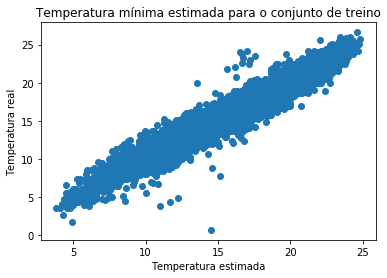

In [63]:
#Gráfico de previsão para o conjunto de treino
plt.scatter(grid_searchTempMin.predict(X_trainTempMin), Y_trainTempMin)
plt.title("Temperatura mínima estimada para o conjunto de treino")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [64]:
#Mostrando uma matriz de correlação das variáveis de treino com a melhor modelagem
print(np.corrcoef(grid_searchTempMin.predict(X_trainTempMin), Y_trainTempMin))

[[1.         0.96924647]
 [0.96924647 1.        ]]


In [0]:
#Previsão para os dados de teste a partir da modelagem obtida
Y_predTempMin = grid_searchTempMin.predict(X_testTempMin)

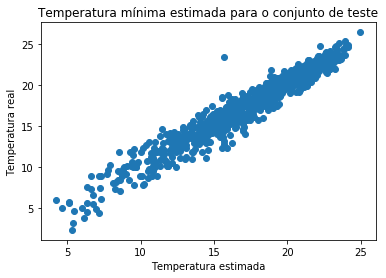

In [66]:
#Gráfico que mostra a relação entre a temperatura mínima real e a temperatura mínima prevista para os dados de teste
plt.scatter(Y_predTempMin, Y_testTempMin)
plt.title("Temperatura mínima estimada para o conjunto de teste")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [67]:
#Mostrando uma matriz de correlação das variáveis de teste com a melhor modelagem
print(np.corrcoef(Y_predTempMin, Y_testTempMin))

[[1.         0.96877343]
 [0.96877343 1.        ]]


In [68]:
#Erro absoluto médio entre temperatura mínima real e prevista para os dados de teste
print(mean_absolute_error(Y_testTempMin, Y_predTempMin))

0.8110643940813401


In [69]:
#Erro quadrático médio entre a temperatura mínima real e a prevista para os dados de teste
print(mean_squared_error(Y_testTempMin, Y_predTempMin))

1.1155582302776073


In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pickle
# Salvando os modelos treinados
filename = '/content/gdrive/My Drive/TemperaturaMaximaFlorianopolis.sav'
pickle.dump(grid_searchTempMax, open(filename, 'wb'))

In [0]:
filename = '/content/gdrive/My Drive/TemperaturaMinimaFlorianopolis.sav'
pickle.dump(grid_searchTempMin, open(filename, 'wb'))